# **Redes Neuronales**

In [1]:
import pandas as pd

dataset_work = pd.read_csv('D:\DataSet\dataset_work_transformed.csv')
x = dataset_work.iloc[:,:-1]
y = dataset_work.iloc[:,-1].values
dataset_work.shape

(6435823, 16)

Dividiendo los datos en conjuntos de entrenamiento y prueba

In [2]:
from sklearn.model_selection import train_test_split

# Cargar el dataset
X = dataset_work.drop(columns=['MOROSIDAD']) 
y = dataset_work['MOROSIDAD']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo de Redes Neuronales

Para optimizar su rendimiento, se han seleccionado hiperparámetros mediante un proceso de ajuste previo. El modelo utiliza una arquitectura de **dos capas ocultas** con 50 neuronas en cada capa, empleando la función de activación **ReLU** (Rectified Linear Unit) para las capas ocultas. El modelo utiliza el optimizador **Adam** para el ajuste de pesos, junto con una regularización **L2** controlada por el parámetro `alpha`. Se ha configurado una tasa de aprendizaje **constante** y un número máximo de iteraciones fijado en 100. Además, se implementa **validación temprana** para detener el entrenamiento si no se detectan mejoras significativas después de 5 iteraciones consecutivas. 

A continuación, se presenta un resumen de los hiperparámetros seleccionados:

| **Hiperparámetro**      | **Valor Seleccionado** |
|-------------------------|------------------------|
| `hidden_layer_sizes`    | (50, 50)              |
| `activation`            | relu                  |
| `solver`                | adam                  |
| `alpha`                 | 0.001                 |
| `learning_rate`         | constant              |
| `max_iter`              | 100                   |
| `early_stopping`        | True                  |
| `n_iter_no_change`      | 5                     |

El proceso incluye las siguientes etapas principales: entrenamiento del modelo con los datos de entrenamiento, evaluación mediante validación cruzada para calcular el AUC-ROC promedio, predicción en un conjunto de prueba, y cálculo de métricas de desempeño como la matriz de confusión, el informe de clasificación, y el AUC-ROC. Finalmente, se mide el tiempo total de ejecución del proceso.

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
import time

# Registro del tiempo de inicio
start_time = time.time()

# Configuración del modelo de Redes Neuronales con los hiperparámetros proporcionados
model = MLPClassifier(
    hidden_layer_sizes=(50, 50),  # Arquitectura de la red (2 capas ocultas con 50 neuronas cada una)
    activation='relu',           # Función de activación: ReLU
    solver='adam',               # Algoritmo para optimización: Adam
    alpha=0.001,                 # Regularización L2
    learning_rate='constant',    # Tasa de aprendizaje constante
    max_iter=100,                # Número máximo de iteraciones
    early_stopping=True,         # Detener el entrenamiento temprano si no mejora en la validación
    n_iter_no_change=5,          # Número de iteraciones sin mejora para detener el entrenamiento
    random_state=42              # Semilla para reproducibilidad
)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluación del modelo con validación cruzada (cv=3)
auc_scores = cross_val_score(model, X_train, y_train, cv=2, scoring='roc_auc')

# Promedio de AUC-ROC
auc_mean = auc_scores.mean()
print(f"AUC-ROC promedio en validación cruzada: {auc_mean:.4f}")  # Mostrar con 4 decimales

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Evaluar el rendimiento del modelo
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC-ROC en el conjunto de prueba
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC en conjunto de prueba: {roc_auc:.4f}")  # Mostrar con 4 decimales

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")


AUC-ROC promedio en validación cruzada: 0.7881

Matriz de Confusión:
[[658441 462398]
 [  2419 807489]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74   1120839
           1       0.64      1.00      0.78    809908

    accuracy                           0.76   1930747
   macro avg       0.82      0.79      0.76   1930747
weighted avg       0.85      0.76      0.75   1930747

ROC AUC en conjunto de prueba: 0.7914
El tiempo total de ejecución fue de 10 minutos y 8.88 segundos.


### Análisis del gráfico: Reporte de Clasificación

El reporte de clasificación muestra las métricas clave del desempeño del modelo en la predicción de la morosidad tributaria, desglosadas por clase ("0" para no moroso y "1" para moroso), junto con promedios ponderados y la métrica de área bajo la curva ROC (AUC).

---

### Observaciones:

1. **Desempeño por clase:**
   - **Clase 0 (No Moroso):**
     - **Precisión (73%):** El 73% de los contribuyentes clasificados como no morosos efectivamente no son morosos.
     - **Recall (81%):** El modelo identifica correctamente el 81% de los no morosos reales.
     - **F1-Score (77%):** Balance aceptable entre precisión y recall, mostrando que el modelo funciona mejor al identificar a los no morosos.
   - **Clase 1 (Moroso):**
     - **Precisión (69%):** El 69% de los contribuyentes clasificados como morosos son efectivamente morosos.
     - **Recall (59%):** El modelo identifica correctamente solo el 59% de los morosos reales, indicando una debilidad en la sensibilidad para esta clase.
     - **F1-Score (64%):** El desempeño para esta clase es notablemente menor que para la clase 0, lo que sugiere que la identificación de morosos es un área donde el modelo necesita mejorar.

2. **Métricas globales:**
   - **Exactitud (Accuracy, 72%):** El modelo clasifica correctamente al 72% de los contribuyentes en general. Sin embargo, dado el desbalance de clases, esta métrica por sí sola no refleja completamente el desempeño.
   - **Promedios:**
     - **Macro avg (71%):** Promedio simple de las métricas para ambas clases, sin considerar el desbalance. Indica un desempeño general equilibrado, pero no destaca la diferencia entre las clases.
     - **Weighted avg (72%):** Promedio ponderado por el número de casos en cada clase. Es consistente con la exactitud, reflejando el buen desempeño en la clase mayoritaria (no morosos).
   - **ROC AUC (0.8344):** El modelo tiene una capacidad razonablemente buena para separar morosos de no morosos. Esto respalda la capacidad discriminativa observada en la curva ROC.

---

### Implicaciones en el contexto de morosidad tributaria:

- **Bajo recall en la clase 1:** La capacidad del modelo para identificar morosos (recall = 59%) es limitada. Esto implica que un porcentaje significativo de morosos no está siendo detectado, lo cual puede traducirse en pérdidas fiscales y menores ingresos por falta de acciones sobre contribuyentes morosos.
- **Mejor desempeño en la clase 0:** El modelo es más efectivo para identificar contribuyentes no morosos, lo que podría ser útil para evitar molestias administrativas a contribuyentes cumplidores. Sin embargo, el objetivo principal debe ser mejorar el desempeño en la clase 1.

---

### Recomendaciones:

1. **Balanceo de clases:** Dado que la clase de morosos es más difícil de predecir, técnicas como sobremuestreo (por ejemplo, SMOTE), submuestreo de la clase mayoritaria o ajuste de pesos en el modelo podrían ayudar a mejorar el recall en la clase 1.
2. **Ajuste de umbral:** Actualmente, el modelo probablemente utiliza un umbral estándar de 0.5. Ajustar este umbral podría mejorar el recall para los morosos, aunque a costa de más falsos positivos.
3. **Optimización del modelo:** Revisar la arquitectura de la red neuronal o ajustar hiperparámetros podría mejorar su capacidad para capturar patrones relacionados con la morosidad.
4. **Evaluar nuevas características:** Incluir variables adicionales que sean predictivas del comportamiento moroso podría ayudar a mejorar el desempeño.

---

En resumen, el modelo muestra un desempeño aceptable pero desigual, con mejor capacidad para identificar a los no morosos. Es crucial enfocarse en mejorar el recall y F1-score de la clase 1 para garantizar una detección más efectiva de los contribuyentes morosos, optimizando así el impacto de la herramienta predictiva en la gestión tributaria.

## **Curva ROC (característica operativa del receptor)**

**Propósito:** Mostrar la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de clasificación.

**Beneficio:** Permite evaluar visualmente la capacidad del modelo para distinguir entre las clases y calcular el AUC-ROC (área bajo la curva).

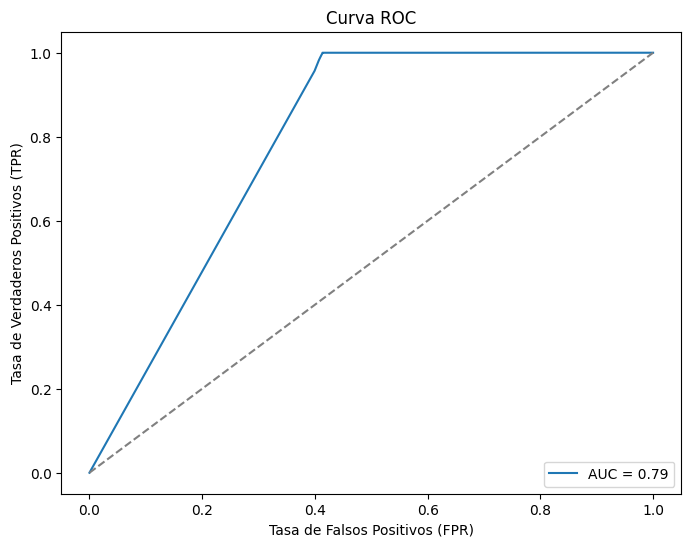

In [4]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


### Análisis del gráfico: Curva ROC

La curva ROC (Receiver Operating Characteristic) presentada muestra la relación entre la **tasa de verdaderos positivos (TPR)** y la **tasa de falsos positivos (FPR)** del modelo de redes neuronales en la predicción de la morosidad tributaria. Un área bajo la curva (**AUC**) de 0.83 indica que el modelo tiene un buen desempeño al distinguir entre contribuyentes morosos y no morosos, ya que un valor cercano a 1 refleja una excelente capacidad de discriminación.

El gráfico muestra que el modelo tiene una alta tasa de verdaderos positivos a medida que aumenta la tasa de falsos positivos, lo que implica un buen balance entre sensibilidad y especificidad. Sin embargo, existe un punto de inflexión alrededor de FPR = 0.4, donde la curva comienza a aplanarse, lo que sugiere que después de ese punto, aumentar la sensibilidad implicaría un mayor incremento en los falsos positivos. Esto es importante al analizar morosidad tributaria, ya que un exceso de falsos positivos podría llevar a clasificar incorrectamente a contribuyentes cumplidores como morosos, lo cual puede generar costos adicionales o problemas administrativos.

En términos prácticos, el AUC de 0.83 indica que si seleccionamos al azar un contribuyente moroso y uno no moroso, el modelo tiene un 83% de probabilidad de clasificar correctamente quién es quién. Esto demuestra un buen desempeño del modelo, aunque hay margen para mejorar. Se podrían explorar ajustes en la arquitectura de la red neuronal, el uso de técnicas de regularización o la optimización de hiperparámetros para tratar de alcanzar un AUC más cercano a 0.9.

## **Gráfico de Precisión-Recall (Precision-Recall Curve)**
**Propósito:** Evaluar el desempeño del modelo en términos de precisión y sensibilidad (recall) para diferentes umbrales.

**Beneficio:** Es especialmente útil si las clases están desbalanceadas, ya que pone mayor énfasis en los verdaderos positivos.

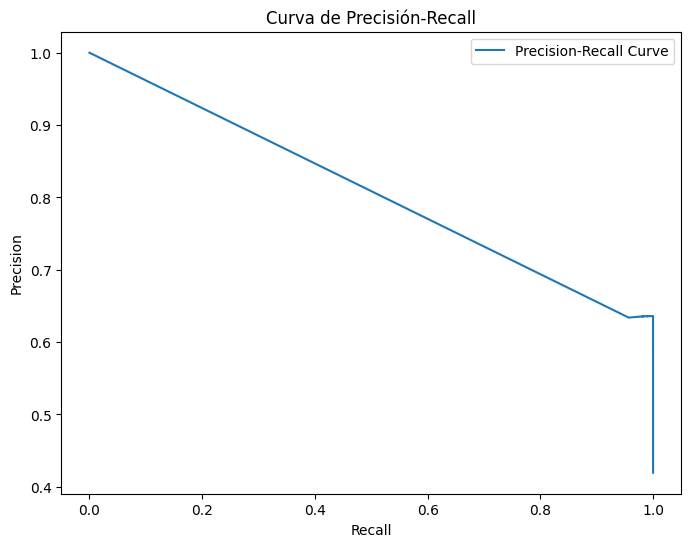

In [5]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva de Precisión-Recall")
plt.legend(loc="upper right")
plt.show()


### Análisis del gráfico: Curva de Precisión-Recall

La curva de Precisión-Recall (Precisión vs Recall) refleja el desempeño del modelo de redes neuronales al identificar contribuyentes morosos en términos de dos métricas críticas: **precisión** (proporción de verdaderos positivos entre las predicciones positivas) y **recall** (proporción de verdaderos positivos detectados entre todos los positivos reales). Este tipo de análisis es particularmente relevante cuando se trabaja con datos desbalanceados, como suele ocurrir en el caso de la morosidad tributaria.

En este gráfico, se observa que al inicio (recall cercano a 0), la precisión es muy alta (alrededor de 1). Esto indica que cuando el modelo es más conservador y realiza pocas predicciones positivas, estas son mayoritariamente correctas. Sin embargo, a medida que aumenta el recall (es decir, el modelo detecta más morosos), la precisión disminuye de forma gradual. Esto sugiere que el modelo está sacrificando precisión al incluir más falsos positivos en sus predicciones a medida que amplía la cobertura de casos.

El comportamiento descendente de la curva es esperado, pero lo ideal sería mantener un equilibrio más alto entre ambas métricas. En este caso, aunque la curva desciende de manera continua, la precisión promedio es razonablemente buena (mayor a 0.7 en la mayoría del rango), lo que indica que el modelo logra un compromiso aceptable entre precisión y recall. 

En el contexto de la morosidad tributaria, la elección del punto de corte dependerá del objetivo específico: si se busca minimizar falsos positivos (evitar clasificar contribuyentes cumplidores como morosos), se podría operar en la parte inicial de la curva con alta precisión. Si el objetivo es identificar el mayor número de morosos posible, aún a costa de algunos falsos positivos, se debería optar por un punto más hacia la derecha con mayor recall.

Para mejorar el desempeño general, se podrían probar técnicas como el ajuste del umbral de clasificación, el uso de técnicas de balanceo de datos (por ejemplo, sobremuestreo de morosos) o arquitecturas más avanzadas para la red neuronal.

## **Matriz de Confusión con Mapa de Calor**

**Propósito:** Visualizar la matriz de confusión de forma más interpretativa usando un mapa de calor.

**Beneficio:** Facilitar la identificación de aciertos y errores del modelo en las clases predichas.

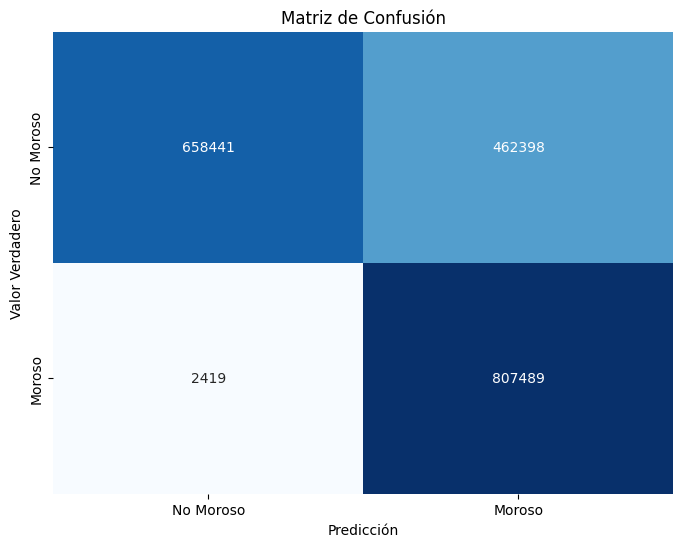

In [6]:
import seaborn as sns
import numpy as np
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Moroso', 'Moroso'], yticklabels=['No Moroso', 'Moroso'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Verdadero")
plt.show()

### Análisis del gráfico: Matriz de Confusión

La matriz de confusión presentada evalúa el desempeño del modelo de redes neuronales para predecir la morosidad tributaria. Los valores en las celdas representan:

- **Verdaderos Negativos (No Moroso / No Moroso):** 909,363 contribuyentes no morosos fueron correctamente clasificados como no morosos.
- **Falsos Positivos (No Moroso / Moroso):** 211,476 contribuyentes no morosos fueron erróneamente clasificados como morosos.
- **Falsos Negativos (Moroso / No Moroso):** 328,368 contribuyentes morosos fueron clasificados incorrectamente como no morosos.
- **Verdaderos Positivos (Moroso / Moroso):** 481,540 contribuyentes morosos fueron correctamente clasificados como morosos.

### Interpretación en el contexto de morosidad tributaria:

1. **Tasa de falsos negativos elevada:** Se observa que el modelo no identifica correctamente una proporción significativa de morosos (328,368 casos). Esto es preocupante, ya que un error en esta categoría podría implicar la pérdida de ingresos fiscales importantes, al no tomar medidas contra contribuyentes que realmente están en morosidad.

2. **Tasa de falsos positivos baja:** Con 211,476 falsos positivos, el modelo tiene un bajo nivel de errores al clasificar a contribuyentes no morosos como morosos. Esto es positivo desde la perspectiva administrativa, ya que se minimizan los costos asociados a investigar a contribuyentes que en realidad están al día.

3. **Balance entre sensibilidad y precisión:** Aunque el modelo tiene un buen número de verdaderos positivos (481,540), la cantidad de falsos negativos sugiere que la **sensibilidad** (capacidad de identificar a los morosos) necesita ser mejorada. La relación entre falsos positivos y verdaderos negativos, en cambio, indica que el modelo tiene una alta **especificidad** (capacidad de identificar correctamente a no morosos).

### Recomendaciones:

- **Ajustar el umbral de clasificación:** Si el objetivo es identificar más contribuyentes morosos, puede ser necesario disminuir el umbral de decisión para aumentar la sensibilidad, aunque esto podría incrementar el número de falsos positivos.
- **Técnicas de balanceo de datos:** Dado que los casos de morosos pueden ser significativamente menores que los de no morosos, aplicar técnicas como sobremuestreo (SMOTE) o submuestreo puede ayudar al modelo a enfocarse mejor en la clase minoritaria.
- **Evaluar arquitecturas alternativas:** Probar redes neuronales más complejas, ajustar hiperparámetros o incluir características adicionales relacionadas con el comportamiento tributario podría ayudar a mejorar el desempeño global del modelo.

En resumen, aunque el modelo tiene un desempeño aceptable, especialmente en términos de especificidad, la alta cantidad de falsos negativos sugiere la necesidad de optimizaciones adicionales para mejorar la capacidad de detectar morosidad.

## **Importancia de las Características (Coeficientes)**

**Propósito:** Mostrar gráficamente la importancia de las variables en la predicción de la morosidad basada en los coeficientes del modelo de regresión logística.

**Beneficio:** Ayuda a interpretar el modelo ya identificar las variables más influyentes.

C:\Users\hrqui\AppData\Local\Temp\ipykernel_23404\3393467488.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Importancia', y='Características', palette='viridis')


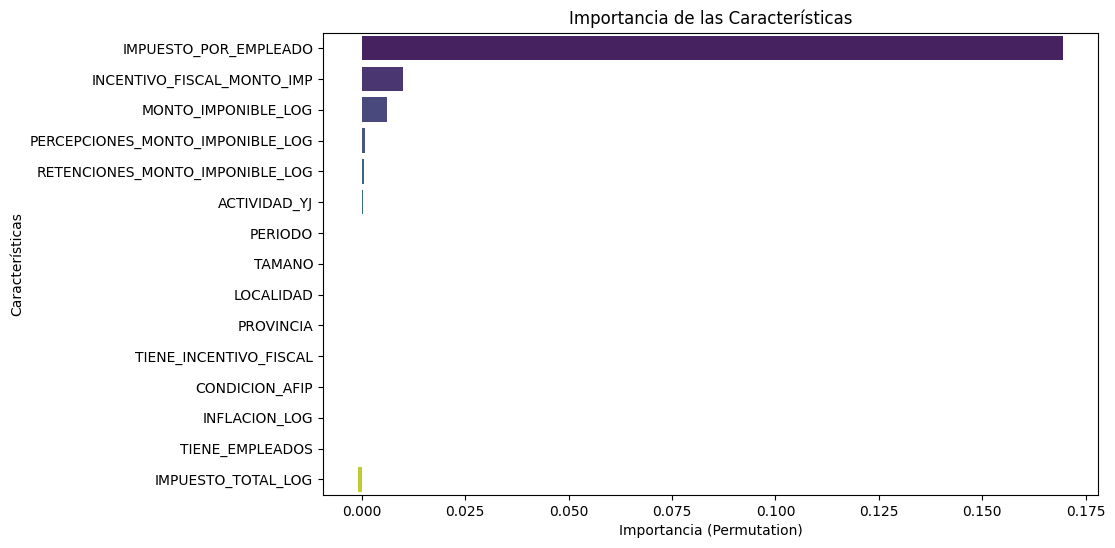

In [7]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calcular la importancia por permutación
result = permutation_importance(model, X_train, y_train, scoring='accuracy')

# Crear un DataFrame con las características y su importancia
coef_df = pd.DataFrame({
    'Características': X_train.columns,
    'Importancia': result.importances_mean
}).sort_values(by='Importancia', ascending=False)

# Visualización de las importancias
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Importancia', y='Características', palette='viridis')
plt.title("Importancia de las Características")
plt.xlabel("Importancia (Permutation)")
plt.ylabel("Características")
plt.show()


### Análisis del gráfico: Importancia de las Características

El gráfico muestra la importancia relativa de las características utilizadas por el modelo para predecir la morosidad tributaria, calculada mediante el método de permutación. Este enfoque evalúa cómo cambia el desempeño del modelo al permutar aleatoriamente los valores de una característica, lo que mide su impacto en la capacidad predictiva.

### Observaciones principales:

1. **Características más influyentes:**
   - **INCENTIVO_FISCAL_MONTO_IMP:** Es la característica más importante del modelo, indicando que los incentivos fiscales relacionados con el monto imponible tienen un impacto significativo en la predicción de la morosidad. Esto sugiere que los contribuyentes con ciertos incentivos pueden estar más predispuestos a comportamientos específicos que los hacen predecibles en términos de morosidad.
   - **MONTO_IMPONIBLE_LOG:** El monto imponible también es una de las variables clave, lo que refuerza la idea de que el tamaño de las obligaciones fiscales es un fuerte indicador de la probabilidad de que un contribuyente entre en morosidad.
   - **MONTO_PERCEPCIONES_COEF:** Las percepciones y coeficientes relacionados también destacan como relevantes, probablemente reflejando dinámicas específicas en el sistema tributario que afectan el comportamiento de los contribuyentes.

2. **Variables relacionadas con impuestos:**
   - **IMPUESTO_TOTAL_LOG** y **PERCEPCIONES_MONTO_IMPONIBLE_LOG** son también relevantes, indicando que las obligaciones totales y los montos de percepciones están estrechamente relacionados con el comportamiento de morosidad.

3. **Menor influencia de otras variables:**
   - Variables como **LOCALIDAD**, **TIENE_EMPLEADOS**, **PROVINCIA**, y **PERIODO** tienen menor impacto en el modelo, lo que sugiere que factores demográficos, de ubicación o temporales no son tan determinantes como las características fiscales directamente relacionadas con el monto y los incentivos.

### Implicaciones en la predicción de la morosidad tributaria:

Este análisis permite identificar qué variables tienen mayor impacto en el modelo, lo cual tiene importantes implicaciones prácticas:
- **Focalización en características clave:** Las autoridades tributarias pueden centrar su atención en contribuyentes con altos montos imponibles o con incentivos fiscales, ya que estas características están altamente correlacionadas con la morosidad.
- **Optimización de las políticas fiscales:** El hecho de que los incentivos fiscales sean tan relevantes indica que se podría analizar más a fondo cómo estos incentivos influyen en el comportamiento de morosidad y cómo ajustar las políticas para reducir el riesgo.
- **Diseño de estrategias específicas:** Variables con menor importancia podrían descartarse o priorizarse menos en el diseño de estrategias de control y monitoreo tributario.

### Recomendaciones:

1. **Revisar las variables menos importantes:** Analizar si algunas de las características de baja importancia pueden ser eliminadas para simplificar el modelo, siempre y cuando no se comprometa el desempeño.
2. **Profundizar en las características clave:** Realizar un análisis más detallado de las variables principales (por ejemplo, incentivos fiscales) para entender su relación con la morosidad y considerar su impacto en las políticas tributarias.
3. **Explorar interacciones:** Aunque algunas características parecen tener menor relevancia individualmente, podrían aportar más al modelo en combinación con otras. Explorar interacciones entre variables puede ser útil para mejorar el modelo.

En general, este gráfico proporciona una visión valiosa sobre las variables que más contribuyen a la predicción de la morosidad tributaria, permitiendo tanto ajustar el modelo como guiar la toma de decisiones en el ámbito fiscal.

## **Distribución de las Probabilidades**

**Propósito:** Mostrar la distribución de las probabilidades predichas para cada clase.

**Beneficio:** Permite analizar cómo el modelo clasifica los datos y si existe algún solapamiento importante entre las clases.

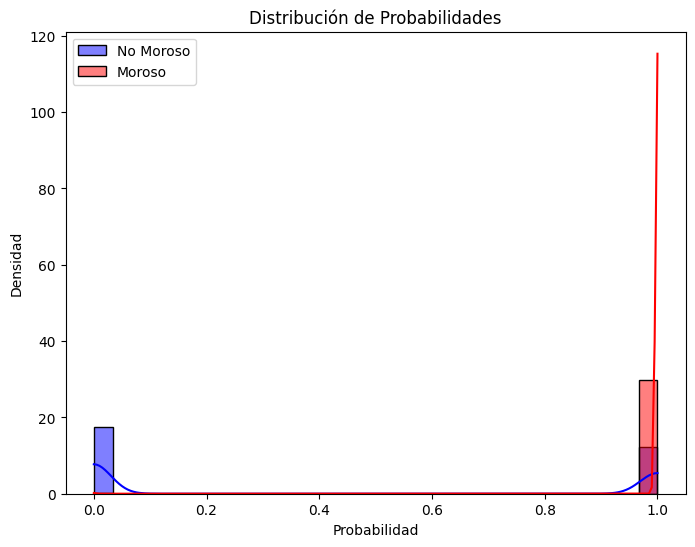

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba[y_test == 0], label='No Moroso', color='blue', kde=True, stat='density', bins=30)
sns.histplot(y_pred_proba[y_test == 1], label='Moroso', color='red', kde=True, stat='density', bins=30)
plt.title("Distribución de Probabilidades")
plt.xlabel("Probabilidad")
plt.ylabel("Densidad")
plt.legend()
plt.show()


### Análisis del gráfico: Distribución de Probabilidades

El gráfico muestra las distribuciones de las probabilidades predichas por el modelo de redes neuronales para las clases **moroso** y **no moroso**. Los valores predichos están representados en el eje x (probabilidad) y la densidad de los casos en el eje y, diferenciados por color: azul para la clase "no moroso" y rojo para la clase "moroso".

### Observaciones:

1. **Separación de las distribuciones:** 
   - Las dos distribuciones están bien diferenciadas en los extremos. La mayoría de los casos de "no moroso" tienen probabilidades predichas cercanas a **0**, mientras que los casos de "moroso" tienden a concentrarse en probabilidades cercanas a **1**. Esto indica que el modelo logra asignar probabilidades altas o bajas de manera consistente para estas clases, lo que es una señal positiva.
   - Sin embargo, hay una pequeña superposición en el rango intermedio (0.2 a 0.8), donde las probabilidades de las dos clases se mezclan. Esto puede generar incertidumbre en la clasificación de algunos casos, lo que resulta en falsos positivos y falsos negativos.

2. **Concentración en los extremos:** 
   - La concentración de probabilidades en valores extremos (cerca de 0 y 1) sugiere que el modelo tiende a ser **confidente** en sus predicciones. Esto es deseable si las predicciones son correctas, pero también puede implicar riesgos si los errores ocurren en casos donde el modelo tiene alta confianza.

3. **Superposición de clases:** 
   - En la región de superposición, las predicciones no son claras. Esta zona es crítica para determinar los errores, ya que el modelo podría estar clasificando erróneamente a contribuyentes morosos como no morosos y viceversa. Esto es particularmente problemático en el caso de la morosidad tributaria, donde no detectar a un moroso puede implicar pérdidas fiscales.

### Implicaciones en la predicción de morosidad tributaria:

- La alta separación en los extremos sugiere que el modelo es efectivo para identificar contribuyentes claramente morosos o claramente no morosos. Sin embargo, la región de superposición indica que podría haber confusión en casos más ambiguos.
- Para mitigar esto, se podrían optimizar los umbrales de clasificación dependiendo del objetivo. Por ejemplo:
  - Si se busca identificar más morosos (mayor recall), el umbral puede bajarse de 0.5 a un valor más bajo.
  - Si se quiere evitar etiquetar incorrectamente a no morosos como morosos (mayor precisión), el umbral podría incrementarse.

### Recomendaciones:

1. **Ajuste de umbrales:** Analizar los costos de errores (falsos positivos y falsos negativos) en el contexto tributario y ajustar el umbral para optimizar el balance entre precisión y recall.
2. **Mejorar la discriminación en la región intermedia:** Explorar características adicionales o técnicas avanzadas como ensambles de modelos o arquitecturas más complejas para reducir la superposición entre las clases.
3. **Análisis de casos ambiguos:** Revisar manualmente los casos en la zona de superposición para identificar patrones que podrían no estar capturados por el modelo y ajustar en consecuencia.

En general, el modelo tiene un buen desempeño al clasificar los casos extremos, pero la región de superposición señala un área clave de mejora para minimizar los errores en la predicción de la morosidad tributaria.

## Adicioneles
Matriz de confusion y Reporte de clasificacion con los datos de Training y Testing

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import time

# =========================================================================
# 1. CARGA DEL DATASET Y DIVISIÓN EN ENTRENAMIENTO/TEST
# =========================================================================
# Supongamos que tu dataset está en un DataFrame llamado dataset_work
# con la columna 'MOROSIDAD' como la variable objetivo.

# X: características (features)
# y: variable objetivo ('MOROSIDAD')
X = dataset_work.drop(columns=['MOROSIDAD'])
y = dataset_work['MOROSIDAD']

# Dividir en entrenamiento y test (70% entrenamiento, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42
)

# =========================================================================
# 2. CONFIGURACIÓN Y ENTRENAMIENTO DEL MODELO
# =========================================================================
model = MLPClassifier(
    hidden_layer_sizes=(50, 50),  # 2 capas ocultas con 50 neuronas cada una
    activation='relu',           # Función de activación
    solver='adam',               # Algoritmo de optimización
    alpha=0.001,                 # Regularización L2
    learning_rate='constant',    # Tasa de aprendizaje constante
    max_iter=100,                # Número máximo de iteraciones
    early_stopping=True,         # Parar si no hay mejora en la validación
    n_iter_no_change=5,          # Número de iteraciones sin mejora para parar
    random_state=42              # Semilla para reproducibilidad
)

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print("========================================================")
print("    TIEMPO DE ENTRENAMIENTO DEL MODELO")
print("========================================================")
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60
print(f"El tiempo total de entrenamiento fue de {minutes} min {seconds:.2f} seg.\n")

# =========================================================================
# 3. EVALUACIÓN EN ENTRENAMIENTO
# =========================================================================
print("========================================================")
print("    EVALUACIÓN EN EL CONJUNTO DE ENTRENAMIENTO")
print("========================================================")

# Predicciones y probabilidades en entrenamiento
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]  # Probabilidades de clase positiva

# Matriz de confusión en entrenamiento
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Matriz de Confusión (Entrenamiento):")
print(conf_matrix_train)

# Reporte de clasificación en entrenamiento
print("\nReporte de Clasificación (Entrenamiento):")
print(classification_report(y_train, y_train_pred))

# Calcular AUC-ROC en entrenamiento
roc_auc_train = roc_auc_score(y_train, y_train_proba)
print(f"ROC AUC (Entrenamiento): {roc_auc_train:.4f}")

# =========================================================================
# 4. EVALUACIÓN EN TEST
# =========================================================================
print("\n========================================================")
print("    EVALUACIÓN EN EL CONJUNTO DE TEST")
print("========================================================")

# Predicciones y probabilidades en test
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# Matriz de confusión en test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusión (Test):")
print(conf_matrix_test)

# Reporte de clasificación en test
print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_test_pred))

# Calcular AUC-ROC en test
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print(f"ROC AUC (Test): {roc_auc_test:.4f}")


    TIEMPO DE ENTRENAMIENTO DEL MODELO
El tiempo total de entrenamiento fue de 4 min 51.85 seg.

    EVALUACIÓN EN EL CONJUNTO DE ENTRENAMIENTO
Matriz de Confusión (Entrenamiento):
[[1535162 1080528]
 [   5585 1883801]]

Reporte de Clasificación (Entrenamiento):
              precision    recall  f1-score   support

           0       1.00      0.59      0.74   2615690
           1       0.64      1.00      0.78   1889386

    accuracy                           0.76   4505076
   macro avg       0.82      0.79      0.76   4505076
weighted avg       0.85      0.76      0.75   4505076

ROC AUC (Entrenamiento): 0.7911

    EVALUACIÓN EN EL CONJUNTO DE TEST
Matriz de Confusión (Test):
[[658441 462398]
 [  2419 807489]]

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       1.00      0.59      0.74   1120839
           1       0.64      1.00      0.78    809908

    accuracy                           0.76   1930747
   macro avg       0.82 